In [1]:
import pandas as pd
import numpy as np
import math
from random import choices
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics

In [2]:
import devanalyst.simulation.statics as S_
import devanalyst.simulation.GenerateTimecards as timecard
from devanalyst.simulation.GenerateTimecards import WorkAssignments
from devanalyst.simulation.simulationModels import BalancedAllocationModel, GreedyAllocationModel, ModelsConfig, \
Distribution, DefaultCostModel

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\statics.ipynb
importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\GenerateTimecards.ipynb
importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\simulationModels.ipynb


In [3]:
import devanalyst.simulation.tests.test_utils as tu_

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\tests\test_utils.ipynb


In [4]:
import devanalyst.simulation.visualizations.simm_visuals as simm_visuals

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\visualizations\simm_visuals.ipynb


<h1>Pilots</h1>

<h2>Searching for a better bar chart for WorkAssignments</h2>

In [5]:
def genReleaseCycleSheets(modelsConfig):
    RELEASE_DURATION = 60
    SPRINT_DURATION = 10
    
    tu_.loadTestResources()
    
    teams_df, stories_df, teamsRepo, storiesRepo, ticketsRepo = tu_.initTestData(tu_.DEV_DF, \
                                                                                           tu_.PM_DF, \
                                                                                           RELEASE_DURATION, \
                                                                                           SPRINT_DURATION, \
                                                                                          modelsConfig)
    
    NUMBER_OF_SPRINTS = 25

    entries_df, worksheets, releaseLog = timecard.runReleaseCycle(teamsRepo, ticketsRepo, storiesRepo, datetime(2018, 1, 15), \
                                                   SPRINT_DURATION, NUMBER_OF_SPRINTS, modelsConfig)    
    
    return entries_df, worksheets, releaseLog, teamsRepo, storiesRepo

In [6]:
SPRINT_DURATION = 10
modelsConfig = ModelsConfig([DefaultCostModel(0.25)], [], GreedyAllocationModel(SPRINT_DURATION)) 
modelsConfig.random.reset(271)
entries_df, worksheets, releaseLog, TEAMS_REPO, STORIES_REPO = genReleaseCycleSheets(modelsConfig)

In [11]:
class VisualizeWork:
    
    def render(start_df, end_df):
        # RGB
        lime = [0/256, 255/256, 0/256,1]
        light_green = [0/256, 220/256, 0/256,1]
        green = [0/256, 128/256, 0/256,1]
        
        amber = [255/256,191/256,0/256,1]
        dark_amber = [255/256,100/256,0/256,1]
        red = [255/256, 0/256, 0/256,1]
        
        aqua = [0/256,255/256,255/256, 1]
        blue = [0/256,0/256,255/256, 1]
        purple = [128/256, 0/256, 128/256, 1]
        
        light_blue = [0/256,200/256,255/256, 1]
        
        start_colors = np.array([blue, light_blue, aqua])
        start_cmp = ListedColormap(start_colors)
        start_ax = start_df.set_index('Breakout').T.plot(kind='bar', stacked=True, \
                                                           colormap = start_cmp, position = 1.0, width=0.35)
        start_ax.set(xlabel = 'Estimate', ylabel = '# of stories')
        
        '''
        newcolors2 = np.array([green, aqua, amber, red])
        newcmp2 = ListedColormap(newcolors2)
        ax2 = burnout_df.set_index('Breakout').T.plot(kind='bar', stacked=True, colormap = newcmp2, position = 1.0, ax=ax, width=0.35)
        ax2.set(xlabel = 'Estimate', ylabel = '# of stories')
        '''
        end_colors = np.array([green, dark_amber, amber, purple, red])
        end_cmp = ListedColormap(end_colors)
        end_ax = end_df.set_index('Breakout').T.plot(kind='bar', stacked=True, \
                                                           colormap = end_cmp, position = 0.0, width=0.35, ax=start_ax)
        end_ax.set(xlabel = 'Estimate', ylabel = '# of stories')


        
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))   
        
        
    def render_backlog(backlog_df):
        # RGB
        lime = [0/256, 255/256, 0/256,1]
        light_green = [0/256, 220/256, 0/256,1]
        green = [0/256, 128/256, 0/256,1]
        
        amber = [255/256,191/256,0/256,1]
        dark_amber = [255/256,100/256,0/256,1]
        red = [255/256, 0/256, 0/256,1]
        gray = [128/256, 128/256, 128/256,1]
        
        aqua = [0/256,255/256,255/256, 1]
        blue = [0/256,0/256,255/256, 1]
        purple = [128/256, 0/256, 128/256, 1]
        
        light_blue = [0/256,200/256,255/256, 1]
        
        start_colors = np.array([gray, green, dark_amber, amber, purple])
        start_cmp = ListedColormap(start_colors)
        start_ax = backlog_df.set_index('Breakout').T.plot(kind='bar', stacked=True, \
                                                           colormap = start_cmp, position = 0.0, width=0.35)
        start_ax.set(xlabel = 'Estimate', ylabel = '# of stories')
        

        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    

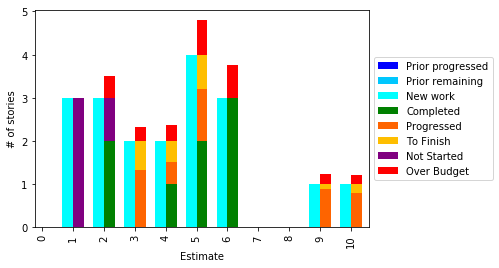

In [12]:
SPRINT = 1
start_df = releaseLog.log['Team A'][SPRINT]['planned_Start_CURRENT_SPRINT']
end_df = releaseLog.log['Team A'][SPRINT]['planned_End_CURRENT_SPRINT']
VisualizeWork.render(start_df, end_df)

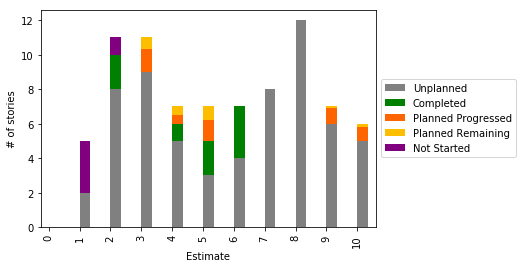

In [9]:
backlog_df = releaseLog.log['Team A'][SPRINT+1]['backlog']
end_df = None
VisualizeWork.render_backlog(backlog_df)

In [10]:
backlog_df

,Breakout,0,1,2,3,4,5,6,7,8,9,10
0,Unplanned,0.0,2.0,8.0,9.000000,5.0,3.0,4.0,8.0,12.0,6.000000,5.0
1,Completed,0.0,0.0,2.0,0.000000,1.0,2.0,3.0,0.0,0.0,0.000000,0.0
2,Planned Progressed,0.0,0.0,0.0,1.333333,0.5,1.2,0.0,0.0,0.0,0.888889,0.8
3,Planned Remaining,0.0,0.0,0.0,0.666667,0.5,0.8,0.0,0.0,0.0,0.111111,0.2
4,Not Started,0.0,3.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


<h2>Burnout in release cycle - Pilot</h2>

In [ ]:
# 
def genReleaseCycle(modelsConfig):
    RELEASE_DURATION = 60
    SPRINT_DURATION = 10
    
    tu_.loadTestResources()
    
    teams_df, stories_df, teamsRepo, storiesRepo, ticketsRepo = tu_.initTestData(tu_.DEV_DF, \
                                                                                           tu_.PM_DF, \
                                                                                           RELEASE_DURATION, \
                                                                                           SPRINT_DURATION, \
                                                                                          modelsConfig)
    
    NUMBER_OF_SPRINTS = 25

    entries_df, worksheets = timecard.runReleaseCycle(teamsRepo, ticketsRepo, storiesRepo, datetime(2018, 1, 15), \
                                                   SPRINT_DURATION, NUMBER_OF_SPRINTS, modelsConfig)    
    
    return entries_df, worksheets, storiesRepo

In [ ]:
def genBurnout(entries_df, storiesRepo):
    bystory = entries_df.groupby('User Story')
    u = bystory.apply(storyInfo, storiesRepo)
    
    
    u = u.reset_index()
    u.drop(['level_1'], axis='columns', inplace=True)
    s = u.groupby('Final Sprint')
    burnout = s.apply(sprintInfo)
    burnout = burnout.reset_index()
    burnout.drop(['level_1'], axis='columns', inplace=True)
    

    return burnout, u

In [ ]:
def storyInfo(group_df, storiesRepo):
    info = {}
    
    #Go back, as min['Date'] is end of first sprint
    info['Start'] = [timecard.subtractBusinessDays(group_df['Date'].min(), SPRINT_DURATION)] 
    info['End'] = [group_df['Date'].max()]
    info['Elapsed Time'] = (info['End'][0] - info['Start'][0]).days
    info['Effort'] = group_df['Time Spent'].sum()
    info['Initial Sprint'] = [group_df['Sprint'].min()]
    info['Final Sprint'] = [group_df['Sprint'].max()]  
    '''
    userStoryId = group_df['User Story']
    userStory = storiesRepo.findStory(userStoryId)
    info['Original estimate'] = userStory.originalEstimate    
    '''
    
    return pd.DataFrame(info)

In [ ]:
def sprintInfo(group_df):
    info = {}
    
    info['Effort'] = group_df['Effort'].sum()
    info['Avg Effort'] = group_df['Effort'].mean()
    info['Stories Completed'] = [group_df['User Story'].count()]
    info['Over 1 sprint'] = [group_df[group_df['Elapsed Time']==14]['User Story'].count()]
    info['Over 2 sprint'] = [group_df[group_df['Elapsed Time']==28]['User Story'].count()]
    info['Over 3 sprint'] = [group_df[group_df['Elapsed Time']==42]['User Story'].count()]
    info['Over 4 sprint'] = [group_df[group_df['Elapsed Time']==56]['User Story'].count()]
 
    
    return pd.DataFrame(info)

In [ ]:
SPRINT_DURATION = 10
modelsConfig1 = ModelsConfig([DefaultCostModel(0.0)], [], BalancedAllocationModel(SPRINT_DURATION)) 
modelsConfig1.random.reset(271)
entries_df1, worksheets1, storiesRepo = genReleaseCycle(modelsConfig1)

In [ ]:
burn1, u1 = genBurnout(entries_df1, storiesRepo)
burn1

In [ ]:
u1

In [ ]:
SPRINT_DURATION = 10
modelsConfig2 = ModelsConfig([DefaultCostModel(0.0)], [], GreedyAllocationModel(SPRINT_DURATION)) 
modelsConfig2.random.reset(271)
entries_df2, worksheets2, storiesRepo = genReleaseCycle(modelsConfig2)

In [ ]:
burn2, u2 = genBurnout(entries_df2, storiesRepo)
burn2

In [ ]:
burn1['Effort'].plot(label = 'Balanced'), burn2['Effort'].plot(label = 'Greedy'), plt.legend()

In [ ]:
burn1['Avg Effort'].plot(label = 'Balanced'), burn2['Avg Effort'].plot(label = 'Greedy'), plt.legend()

In [ ]:
u1_10 = u1[u1['Final Sprint'] == 10]
u1_10.shape

In [ ]:
u1_10[u1_10['Initial Sprint'] == 10]['Effort'].mean()

In [ ]:
u1_10['Effort'].mean()

In [ ]:
u1_10[u1_10['Initial Sprint'] == 10].shape

In [ ]:
u1_10[u1_10['Initial Sprint'] == 9]['Effort'].mean()

In [ ]:
u1_10[u1_10['Initial Sprint'] == 9].shape